<font color='blue'>Cell 1 - Load Iris data set


In [1]:
## Retrieve iris data set

### Upload 'data1.csv' file from the either the drive, or your folder:
# 1) Click the folder icon on the left side of the screen.
# 2) Click the 'upload to session' icon
# 3) locate the 'data1.csv' file and upload it.

iris <- read.csv('data1.csv')
summary(iris)
head(iris)

  Sepal_Length    Sepal_Width     Petal_Length    Petal_Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   Species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


<font color='blue'>Cell 2 - Normalize the data

In [2]:
## Normalize the data
# Save a copy of the original data set
iris_org <- iris

# Function that normalizes the iris data set 
normalizeData <- function(data){
        # Uses scale function to normalize data, with mean = 0, and sd = 1
        norm <- data.frame(scale(data[,1:4]))
        # Adds back on the Species column
        new_data <- cbind(norm, data$Species)
        # Renames the 5th column
        names(new_data)[5] <- 'Species'
        # Returns the data
        return(new_data)
} 
# Call upon the normalizeData function
iris <- normalizeData(iris)
# Shows the first 6 rows of the new iris data set.
head(iris)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-0.8976739,1.0286113,-1.336794,-1.308593,Iris-setosa
2,-1.1392005,-0.1245404,-1.336794,-1.308593,Iris-setosa
3,-1.3807271,0.3367203,-1.393470,-1.308593,Iris-setosa
4,-1.5014904,0.1060900,-1.280118,-1.308593,Iris-setosa
5,-1.0184372,1.2592416,-1.336794,-1.308593,Iris-setosa
6,-0.5353840,1.9511326,-1.166767,-1.046525,Iris-setosa


<font color='blue'>Cell 3 - Randomize and split data

In [3]:
# Cell 10 : Split data set

train_percnt <-  2/3 #  2/3  rows , (aka 100 data rows) will be used to train the ANN
train_idx <- sample(nrow(iris), train_percnt * nrow(iris)) # Randomly selects rows

iris_train <- iris[train_idx, ] # selects 100 rows for the training data set
iris_test <- iris[-train_idx, ] # selects the other 50 rows for the test data set

x_train <- iris_train[,1:4] # selects the first 4 columns for the x (input) data
x_test <-  iris_test[,1:4] 

head(x_train)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
,<dbl>,<dbl>,<dbl>,<dbl>
24,-0.8976739,0.5673506,-1.1667665,-0.9154908
69,0.4307224,-1.9695830,0.4201569,0.3948491
145,1.0345390,0.5673506,1.1002669,1.7051890
56,-0.1730941,-0.5858010,0.4201569,0.1327811
86,0.1891958,0.7979809,0.4201569,0.5258831
61,-1.0184372,-2.4308437,-0.1466015,-0.2603209


<font color='blue'>Cell 4 : One hot encoding function

In [4]:
# Cell 4 : One hot encoding function

to_one_hot_encode <- function(z){
        y <- z[,5]
        binarized <- matrix(data = NA, nrow=nrow(z), ncol=3)
        count <- 1
        for (x in y){
                if(x == 'Iris-setosa'){
                        binarized[count,] <- c(1,0,0)
                }else if( x == "Iris-versicolor" ){
                        binarized[count,] <- c(0,1,0)
                }else if( x == "Iris-virginica" ){
                        binarized[count,] <- c(0,0,1)
                }else {binarized[count,] <- c(X,X,X)}
                count = count + 1
        }
        return (binarized);
}




y_train <- to_one_hot_encode(iris_train)
y_test <- to_one_hot_encode(iris_test)

dim(y_train)
dim(y_test)

head(y_train)

[1] 100   3

[1] 50  3

1,0,0
0,1,0
0,0,1
0,1,0
0,1,0
0,1,0


<font color='blue'>Cell 5 : Activation sigmoid functions

In [5]:
# Cell 6 : Activation sigmoid functions

sigmoid <- function(x){
        return (1/(1+exp(-x)))
}

sigmoid_deriv <- function(x){
        return (sigmoid(x)*(1-sigmoid(x)))
}

user_softmax <- function(A){
        return (exp(A)/rowSums(exp(A)))
}



<font color='blue'>Cell 6: Defining The Training Function for the ANN

In [6]:
training <- function(lr, batch_size, epochs, x_train){
        w0 <-  2*matrix(runif(ncol(x_train)*hidden_size), ncol = hidden_size) -1
        w1 <- 2*matrix(runif(hidden_size*3), ncol = 3) - 1
        
        bh <- runif(hidden_size)
        bo <- runif(3)
        
        num_batch <- floor(nrow(x_train)/batch_size);
        
        errors <- list();
        
        for (epoch in 0:(epochs-1)){
                #####  Feed Forward #######
                for (current_batch in 0:num_batch){
                        # Feed Forward Phase 1
                        batch_start <- current_batch * batch_size;
                        batch_end <- batch_start + batch_size;
                        if (batch_end>nrow(x_train)){
                                batch_end <- nrow(x_train)
                        }
                        input_batch <- as.matrix(x_train[batch_start:batch_end,]);
                        
                        zh <- (input_batch %*% w0) + bh;
                        layer1 <-  sigmoid(zh);
                        
                        # Feed Forward Phase 2
                        zo <- (layer1 %*% w1) + bo;
                        layer2 <- user_softmax(zo);
                        
                        ##### Back Propagation ######
                        
                        # Back propagation phase 1
                        labels_batch <- y_train[batch_start:batch_end,];
                        layer2_error = layer2 - labels_batch;
                        layer2w_delta = (t(layer1) %*% layer2_error);
                        
                        layer2b_delta <- layer2_error
                        
                        # Back porpagation phase 2
                        
                        dcost_dah <- (layer2_error %*% t(w1))
                        dah_dzh <- sigmoid_deriv(zh);
                        
                        layer1_error <- dah_dzh * dcost_dah;
                        layer1w_delta <- (t(input_batch) %*% layer1_error);
                        
                        layer1b_delta <- layer1_error
                        
                        # Update Weights
                        w0 = w0 - (lr*layer1w_delta);
                        bh =  bh - (lr * colSums(layer1b_delta));
                        
                        w1 =  w1 - (lr * layer2w_delta);
                        bo = bo - (lr * colSums(layer2b_delta));
                        
                }
                
                # Update error(s)
                error <-  mean(abs(layer2_error));
                errors = append(errors,error)
        }
        return_list <- list(w0, bh, w1, bo, error, errors);
        return (return_list)
}
        
 



<font color='blue'>Cell 7: Evaluation function  

In [7]:
evaluation <- function(params, tst_set){
        w0 <-  params[[1]]
        bh <-  params[[2]]
        w1 <-  params[[3]]
        bo <-  params[[4]]
        tst_set <- as.matrix(tst_set)
        # Phase 1
        zh <- (tst_set %*% w0) + bh
        layer1 <-  sigmoid(zh);
        
        # Phase 2 layer2 is final output
        zo <- (layer1 %*% w1) +bo;
        layer2 <- user_softmax(zo);
        
        return (layer2);
}

<font color='blue'>Cell 8: Select Parameters and train the data set
  

In [8]:
# Set parameters
learning_rate <- 0.01
hidden_size <-  5
batch_size = 10
epochs = 500

# Call upon the training function
trained_data <- training(learning_rate, batch_size, epochs, x_train)  

# break returned list into different parameters
trained_params <- trained_data[1:4] # training parameters
error <- trained_data[[5]] 
errors <- trained_data[[6]]

<font color='blue'>Cell 9: plotting the accuracy chart
  

Training Accuracy:  99.73 %

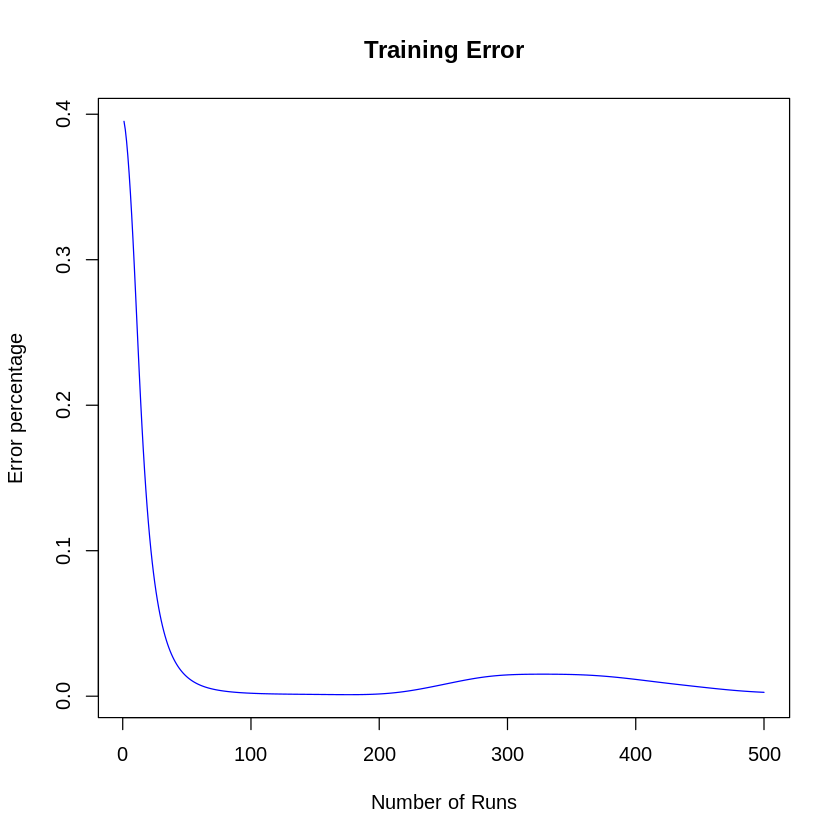

In [9]:
# Cell 14 : plotting the accuracy chart

one_to_100 <- c(1:length(errors))
accuracy <- signif(((1-error)*100),4)
accuracy <- paste(accuracy,"%")
plot(one_to_100, errors ,main="Training Error", ylab = "Error percentage",
     xlab = "Number of Runs", type = "l", col="blue")

cat("Training Accuracy: ",accuracy)

<font color='blue'>Cell 10: Evalutate and Create a Confusion Matrix
  

In [10]:
# Cell 15 : Run the evaluation function 
# Using the trained parameters, the 'evaluate' function outputs a list of the most likely flowers
# We then compare the results with the actual results(y_test) in the form of a Confustion Matrix
prediction <- evaluation(trained_params,x_test) 

# Confusion matrix 

# Applying the which.max function across each row of the predicted values.
predicted_values <- apply(prediction, 1, which.max)
# Doing the same with the y_test dataset
observed_values <- apply(y_test, 1, which.max)
# Create the table
table <- table(predicted_values, observed_values)
rownames(table) <- c('B','C','H')
colnames(table) <- c('B','C','H') 

table
# Function to normalize the confusion matrix
normalizeCM <- function(cm){
        cm_norm <- cm
        for ( i in 1:nrow(cm)){
                for ( j in 1:ncol(cm)){
                        cm_norm[i,j] <- cm[i,j]/sum(cm[i,])
                }
        }
        return(round(cm_norm, 2))
}
cat("\n")
cat("Normalized Confusion Matrix: ")
cat("\n")
normalizeCM(table)

                observed_values
predicted_values  B  C  H
               B 14  0  0
               C  3  8  9
               H  0  6 10


Normalized Confusion Matrix: 


                observed_values
predicted_values    B    C    H
               B 1.00 0.00 0.00
               C 0.15 0.40 0.45
               H 0.00 0.38 0.62

<font color='blue'>Cell 8

In [11]:
# Function to Normalize new input data
normalizeNewValues <- function(features){
        norm_features <- data.frame('Sepal_Length'= 0, 'Sepal_Width'= 0,
                                       'Petal_Length'= 0, 'Petal_Width'= 0)
        for (i in 1:4){
                x <- ((features[i]-mean(iris_org[,i]))/sd(iris_org[,i]))
                norm_features[1,i] <- x
                
        } 
        return(norm_features)
}

<font color='blue'>Cell 9- Test the Neural Network - Define the InputValue function

In [12]:
## Testing the Neural Network with user inputted values
# The below function inputValue asks the user to enter a numeric value for a certain feature
inputValue <- function(feature_name){
  # creates message to prompt user to input the respective value
  message <- paste("Enter ", feature_name, ": ")
  while(TRUE){
    # If below zero or above 10, prints out error message, and prompts the user once more 
    # to input a value for the respective feature
    value = as.double(readline(prompt = message))
    if(value<0 | value>10){
      warning("Invalid entry, please try again")
    } else {
      
      return(value)
    }
  } 
}

<font color='blue'>Cell 10- Define the predictSpecies function

In [13]:
# Create a species level vector to transpose numeric values of 1,2,3 into 
# 'iris-setosa', 'iris-versicolor', and 'iris-virginica', respectively
species_levels <- levels(factor(iris$Species))

## Function to predict species 
predictSpecies <- function(measurements){
        # Call upon the  normalizeNewValues function
        norm_measurements <- normalizeNewValues(measurements)
        # Using the evaluation function and our created neural network, this creates prediction 
        # probabilities for the 3 possible outcomes 
        prediction_prob <- evaluation(trained_params, norm_measurements) # run values through the evaluation program
        # Select the most probably species. 
        prediction <- which.max(prediction_prob)
        # Change prediction from numeric to character using species_levels
        prediction <- species_levels[prediction]
        # Inform user of calculated prediction
        cat("That flower is most likely: ", prediction)
}



<font color='blue'>Cell 11

In [14]:
# Call upon the inputValue function four times to obtain the four input values
print('Measurements need to be numeric values between 0 and 10')
sepal_length <-  inputValue('Sepal Length')
sepal_width <-  inputValue('Sepal Width')
petal_length <- inputValue('Petal Length')
petal_width <- inputValue('Petal Width')

# create a list with the four given measurements
features = c(sepal_length, sepal_width, petal_length, petal_width)

# Call upon the predictSpecies function 
predictSpecies(features)

[1] "Measurements need to be numeric values between 0 and 10"
Enter  Sepal Length : 5.1
Enter  Sepal Width : 3.5
Enter  Petal Length : 1.4
Enter  Petal Width : .2
That flower is most likely:  Iris-setosa